# Introduction


You can use **Graph-Tool** to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.

Note that many exercises are followed by a block with some `assert` statements. These assertions may be preceded by some setup code. They are provided to give you feedback that you are on the right path -- receiving an `AssertionError` probably means you've done something wrong.

## Official documentation for version used in this tutorial

https://graph-tool.skewed.de/

## Official tutorial for version used in this tutorial

https://graph-tool.skewed.de/static/doc/quickstart.html

# Installing graph-tool 

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [ ]:
!apt-get install libcairo2-dev 
!pip install pycairo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!sudo echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!sudo apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!sudo apt-get update
!sudo apt-get install python3-graph-tool python3-matplotlib
#!sudo ln -s /usr/lib/python3/dist-packages/gi/_gi.cpython-{36m,37m}-x86_64-linux-gnu.so

Executing: /tmp/apt-key-gpghome.7DIrXTAaF5/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:4 http://downloads.skewed.de/apt bionic InRelease [4,310 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11

In [ ]:
# Only for validation purposes
from graph_tool.all import *

g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

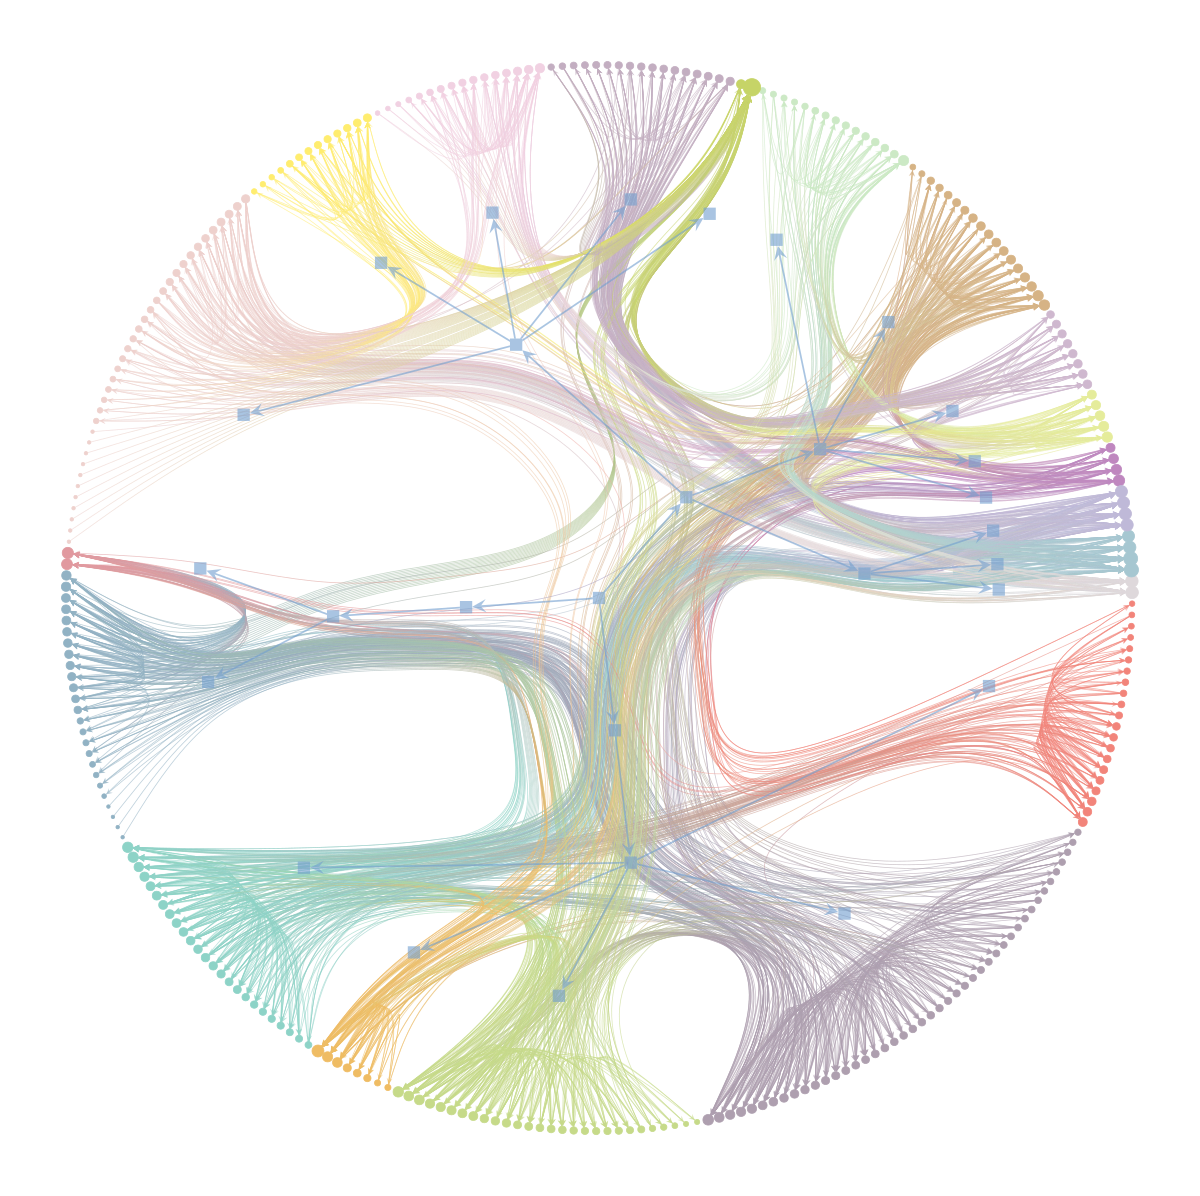

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fec1e118a50, at 0x7fec1e0e08d0>,
 <Graph object, directed, with 326 vertices and 325 edges, at 0x7fec1e0e0ed0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fec1e0e0ed0, at 0x7fec1e1ecb50>)

In [ ]:
state.draw()

# The `import` statement



Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load Graph-Tool, but give it a short alias `gt` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import graph_tool as gt
%matplotlib inline

Let's check the installed version of Graph-Tool. 

In [ ]:
gt.__version__

'2.39 (commit dec169a3, Wed Jun 23 09:42:44 2021 +0200)'

# Creating and drawing undirected graphs

In [ ]:
# create an undirected graph
g = gt.Graph(directed=False)

Once a graph is created, it can be populated with vertices and edges. A vertex can be added with the **add_vertex()** method, which returns an instance of a Vertex class, also called a vertex descriptor. Edges can be added in an analogous manner, by calling the **add_edge()** method, which returns an edge descriptor (an instance of the Edge class).

In [ ]:
# add two vertex to the graph
v1 = g.add_vertex(n=1)
v2 = g.add_vertex(n=1)

#add the property to vertex object
vprop = g.new_vertex_property("string")

#set the value to the vertex property
vprop[v1] = "a" #here you set text to v1 property
vprop[v2] = "b" #here you set text to v2 property

#assign properties as a dic value
g.vertex_properties["name"]=vprop 

#add edge
g.add_edge(v1,v2) #add an edge 

#draw you graph
gt.draw.graph_draw(g,
                   vertex_text=g.vertex_properties["name"],
                   vertex_font_size=10, 
                   output_size=(100, 100),
                   output="test.png")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd3db0065d0, at 0x7fd3db019250>

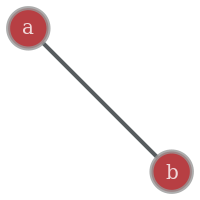

In [ ]:
display(Image('test.png'))

In [ ]:
# add two vertexes
g.add_vertex(n=2)

# vp means vertexe property, name is the attribute created
g.vp.name[2] = "c"
g.vp.name[3] = "d"

#add edge
g.add_edge(g.vertex(0),g.vertex(2)) #add an edge A-C
g.add_edge(g.vertex(2),g.vertex(3)) #add an edge C-D
g.add_edge(gt.util.find_vertex(g,vprop,'b')[0],
           gt.util.find_vertex(g,vprop,'c')[0]) #add an edge B-C

#draw you graph
gt.draw.graph_draw(g,
                   vertex_text=g.vertex_properties["name"],
                   vertex_font_size=10, 
                   output_size=(100, 100),
                   output="test.png")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd3db0065d0, at 0x7fd3db006c90>

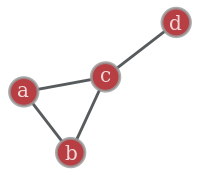

In [ ]:
display(Image('test.png'))

In [ ]:
# create list of edges, in this case (D,B) and (D,A)
edge_list = [(gt.util.find_vertex(g,vprop,'d')[0],gt.util.find_vertex(g,vprop,'b')[0]),
             (gt.util.find_vertex(g,vprop,'d')[0],gt.util.find_vertex(g,vprop,'a')[0])]

# add them to the graph
g.add_edge_list(edge_list)

#draw you graph
gt.draw.graph_draw(g,
                   vertex_text=g.vertex_properties["name"],
                   vertex_font_size=10, 
                   output_size=(100, 100),
                   output="test.png")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd3db0065d0, at 0x7fd3db0bc350>

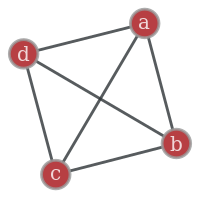

In [ ]:
display(Image('test.png'))

# Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [ ]:
# List all of the vertices
list(g.vertices())

[<Vertex object with index '0' at 0x7fd3daffbc90>,
 <Vertex object with index '1' at 0x7fd3daffbc30>,
 <Vertex object with index '2' at 0x7fd3daffb090>,
 <Vertex object with index '3' at 0x7fd3daffbbd0>]

In [ ]:
# show name.property of the vertices
for v in g.vertices():
  print(g.vp.name[v])

a
b
c
d


In [ ]:
# List all of the edges
list(g.edges())

[<Edge object with source '0' and target '1' at 0x7fd3db3aa3b0>,
 <Edge object with source '0' and target '2' at 0x7fd3dafcb6b0>,
 <Edge object with source '1' and target '2' at 0x7fd3db02eeb0>,
 <Edge object with source '2' and target '3' at 0x7fd3db0396b0>,
 <Edge object with source '3' and target '1' at 0x7fd3db0392b0>,
 <Edge object with source '3' and target '0' at 0x7fd3db0393b0>]

In [ ]:
# show edges by index
for e in g.edges():
  print("Source: {}, Target: {}".format(e.source(),e.target()))

Source: 0, Target: 1
Source: 0, Target: 2
Source: 1, Target: 2
Source: 2, Target: 3
Source: 3, Target: 1
Source: 3, Target: 0


In [ ]:
# show edges by name
for e in g.edges():
  print("Source: {}, Target: {}".format(g.vp.name[e.source()],
                                        g.vp.name[e.target()]))

Source: a, Target: b
Source: a, Target: c
Source: b, Target: c
Source: c, Target: d
Source: d, Target: b
Source: d, Target: a


In [ ]:
# number of edges in Graph
g.num_edges()

6

In [ ]:
# number of vertices in Graph
g.num_vertices()

4

In [ ]:
# get all neibhbors from a vertice by index
g.get_all_neighbors(0)

array([1, 2, 3])

In [ ]:
# get all neighbors from a vertice by name.property
g.get_all_neighbors(gt.util.find_vertex(g,vprop,'a')[0])

array([1, 2, 3])

In [ ]:
# Verify if a vertice is in the Graph by index
2 in g.vertices()

True

In [ ]:
# Verify if a vertice is in the Graph by name.property
'z' in [g.vp.name[v] for v in g.vertices()]

False

In [ ]:
# Verify if a edge (0,2) or (2,0) exist
2 in (g.get_all_neighbors(0))

True

In [ ]:
# get total degree of a list of vertices
g.get_total_degrees([0,1,2,3])

array([3, 3, 3, 3], dtype=uint64)

# EXERCISE 1




Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [ ]:
import numpy as np

def get_leaves(G):
  # PUT YOUR CODE HERE

In [ ]:
# create an undirected graph
g = gt.Graph(directed=False)
g.add_edge_list([(0, 1),
                 (0, 3),
                 (2, 3)])
assert set(get_leaves(g)) == {2, 1}

# Adjacency lists



One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [ ]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



# EXERCISE 2



Write a function max_degree that takes an adjacency list as parameter and returns a 2-tuple with the name and degree of the node with highest degree.

In [ ]:
def max_degree(adjlist):
    # PUT YOUR CODE HERE

In [ ]:
assert max_degree("friends.adjlist") == ('Claire', 4)

# EXERCISE 3



Write a function `mutual_friends` that takes an adjacency list and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example,

    mutual_friends('friends.adjlist', 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends.

In [ ]:
def mutual_friends(adjacency_list, node_1, node_2):
  # PUT YOUR CODE HERE

In [ ]:
assert mutual_friends('friends.adjlist', 'Alice', 'Claire') == ['Frank']
assert mutual_friends('friends.adjlist', 'George', 'Bob') == []
assert sorted(mutual_friends('friends.adjlist', 'Claire', 'George')) == ['Dennis', 'Frank']